In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("../outputs/adapters_pt_log.json", "r") as f:
    data = json.load(f)
res = []
for idx, h in enumerate(data["log_history"]):
#     print(h)
    if "eval_bleu" in h:
        res.append((idx, h["eval_bleu"]))

adapters_pt_df = pd.DataFrame(res, columns=["steps", "bleu"])
adapters_pt_df["name"] = "adapters_pt"

In [3]:
adapters_pt_500k_df = pd.read_csv("../outputs/adapters_500k_bleu_2.csv")
adapters_pt_500k_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_pt_500k_df["name"] = "adapters_pt_500k"
adapters_pt_2m_df = pd.read_csv("../outputs/adapters_2m_bleu_2.csv")
adapters_pt_2m_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_pt_2m_df["name"] = "adapters_pt_2m"
tmp_adapters_bert_df = pd.read_csv("../outputs/adapters_bert_bleu.csv")
adapters_bert_df = tmp_adapters_bert_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/adapters_de_en_bert - eval/bleu"]]
adapters_bert_df.columns = ["steps", "bleu"]
adapters_bert_df["name"] = "adapters_bert"
adapters_random_df = pd.read_csv("../outputs/adapters_random_bleu.csv")
adapters_random_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_random_df["name"] = "adapters_random"
adapters_shuffled_df = pd.read_csv("../outputs/adapters_shuffled_bleu.csv")
adapters_shuffled_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_shuffled_df["name"] = "adapters_shuffled"
adapters_shuffled_both_df = pd.read_csv("../outputs/adapters_shuffled_both_bleu.csv")
adapters_shuffled_both_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_shuffled_both_df["name"] = "adapters_shuffled_both"

/var/folders/7x/9jh7pmld61sf567fnd5q02_r0000gn/T/ipykernel_92113/2597776578.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adapters_bert_df["name"] = "adapters_bert"


In [4]:
baseline_df = pd.read_csv("../outputs/baseline_bleu.csv")
baseline_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
baseline_df["name"] = "baseline"
baseline_500k_df = pd.read_csv("../outputs/baseline_500k_bleu.csv")
baseline_500k_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
baseline_500k_df["name"] = "baseline_500k"
baseline_2m_df = pd.read_csv("../outputs/baseline_2m_bleu.csv")
baseline_2m_df = pd.concat([
    baseline_2m_df["warmup_40000_epoch_40 - eval/bleu"],
    baseline_2m_df["warmup_40000_epoch_40_cont1 - eval/bleu"].iloc[:77],
    baseline_2m_df["warmup_40000_epoch_40_cont2 - eval/bleu"].iloc[:86]
], ignore_index=True).to_frame()
baseline_2m_df.columns = ["bleu"]
baseline_2m_df["name"] = "baseline_2m"
baseline_2m_df["steps"] = range(4, 5 * 288, 5)

In [5]:
tmp_adapters_rand_multiseed_df = pd.read_csv("../outputs/adapters_random_multiseed_bleu.csv")
# 42, 438, 87, 555, 492, 252, 843, 561, 734, 194
adapters_rand_seed_42_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter - eval/bleu"]]
adapters_rand_seed_42_df.columns = ["steps", "bleu"]
adapters_rand_seed_42_df["name"] = "adapters_rand_seed_42"
adapters_rand_seed_438_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_438 - eval/bleu"]]
adapters_rand_seed_438_df.columns = ["steps", "bleu"]
adapters_rand_seed_438_df["name"] = "adapters_rand_seed_438"
adapters_rand_seed_87_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_87 - eval/bleu"]]
adapters_rand_seed_87_df.columns = ["steps", "bleu"]
adapters_rand_seed_87_df["name"] = "adapters_rand_seed_87"
adapters_rand_seed_555_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_555 - eval/bleu"]]
adapters_rand_seed_555_df.columns = ["steps", "bleu"]
adapters_rand_seed_555_df["name"] = "adapters_rand_seed_555"
adapters_rand_seed_492_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_492 - eval/bleu"]]
adapters_rand_seed_492_df.columns = ["steps", "bleu"]
adapters_rand_seed_492_df["name"] = "adapters_rand_seed_492"
adapters_rand_seed_252_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_252 - eval/bleu"]]
adapters_rand_seed_252_df.columns = ["steps", "bleu"]
adapters_rand_seed_252_df["name"] = "adapters_rand_seed_252"
adapters_rand_seed_843_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_843 - eval/bleu"]]
adapters_rand_seed_843_df.columns = ["steps", "bleu"]
adapters_rand_seed_843_df["name"] = "adapters_rand_seed_843"
adapters_rand_seed_561_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_561 - eval/bleu"]]
adapters_rand_seed_561_df.columns = ["steps", "bleu"]
adapters_rand_seed_561_df["name"] = "adapters_rand_seed_561"
adapters_rand_seed_734_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_734 - eval/bleu"]]
adapters_rand_seed_734_df.columns = ["steps", "bleu"]
adapters_rand_seed_734_df["name"] = "adapters_rand_seed_734"
adapters_rand_seed_194_df = tmp_adapters_rand_multiseed_df[["Step", "/storage/brno3-cerit/home/akurniawan/adapters-project/outputs/outputs/random_adapter_194 - eval/bleu"]]
adapters_rand_seed_194_df.columns = ["steps", "bleu"]
adapters_rand_seed_194_df["name"] = "adapters_rand_seed_194"
adapters_rand_multiseed_df = pd.concat([
    adapters_rand_seed_42_df, adapters_rand_seed_438_df, adapters_rand_seed_87_df, adapters_rand_seed_555_df, adapters_rand_seed_492_df,
    adapters_rand_seed_252_df, adapters_rand_seed_843_df, adapters_rand_seed_561_df, adapters_rand_seed_561_df, adapters_rand_seed_734_df, adapters_rand_seed_194_df
])
adapters_rand_multiseed_df

/var/folders/7x/9jh7pmld61sf567fnd5q02_r0000gn/T/ipykernel_92113/314614433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adapters_rand_seed_42_df["name"] = "adapters_rand_seed_42"
/var/folders/7x/9jh7pmld61sf567fnd5q02_r0000gn/T/ipykernel_92113/314614433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adapters_rand_seed_438_df["name"] = "adapters_rand_seed_438"
/var/folders/7x/9jh7pmld61sf567fnd5q02_r0000gn/T/ipykernel_92113/314614433.py:11: SettingWithCopyWarning: 
A value is trying to be set on 

,steps,bleu,name
0,4,0.0314,adapters_rand_seed_42
1,9,3.1866,adapters_rand_seed_42
2,14,5.2116,adapters_rand_seed_42
3,19,6.2704,adapters_rand_seed_42
4,24,6.8096,adapters_rand_seed_42
...,...,...,...
96,484,18.1401,adapters_rand_seed_194
97,489,18.1159,adapters_rand_seed_194
98,494,18.1781,adapters_rand_seed_194
99,499,18.1380,adapters_rand_seed_194


In [6]:
# best_adapters_pt_2m_df = pd.concat([
#     adapters_pt_2m_df["warmup40k_epoch40_clipnorm0.0005 - eval/bleu"],
#     adapters_pt_2m_df["warmup40k_epoch40_clipnorm0.0005_cont - eval/bleu"].iloc[:82]
# ], ignore_index=True).to_frame()
# best_adapters_pt_2m_df.columns = ["bleu"]
# best_adapters_pt_2m_df["name"] = "adapters_pt_2m"
# best_adapters_pt_2m_df["steps"] = range(4, 5 * 231, 5)
# best_adapters_pt_2m_df.head()
adapters_pt_2m_df.head()

,steps,bleu,min_bleu,max_bleu,name
0,4,5.8280,5.8280,5.8280,adapters_pt_2m
1,9,10.4062,10.4062,10.4062,adapters_pt_2m
2,14,15.5082,15.5082,15.5082,adapters_pt_2m
3,19,18.5000,18.5000,18.5000,adapters_pt_2m
4,24,20.1057,20.1057,20.1057,adapters_pt_2m


['baseline', 'baseline_500k', 'baseline_2m']


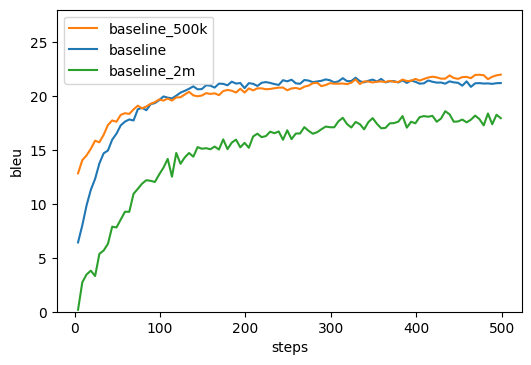

In [40]:
baseline_df = baseline_df[baseline_df["steps"] < 500]
baseline_500k_df = baseline_500k_df[baseline_500k_df["steps"] < 500]
baseline_2m_df = baseline_2m_df[baseline_2m_df["steps"] < 500]
comb_df = pd.concat([baseline_df, baseline_500k_df, baseline_2m_df], ignore_index=True)
# comb_df["name"].unique(), len(comb_df)
plt.figure(figsize=(6, 4), dpi = 100) 
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name", dashes=False)
# ax.legend(["adapters_bert", "adapters_pt_2m", "adapters_pt_500k", "adapters_pt"])
ax.set_ylim([0, 28])
handles, labels = ax.get_legend_handles_labels()
print(labels)
order = [1, 0, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

['adapters_pt', 'adapters_pt_500k', 'adapters_pt_2m', 'adapters_bert', 'baseline']


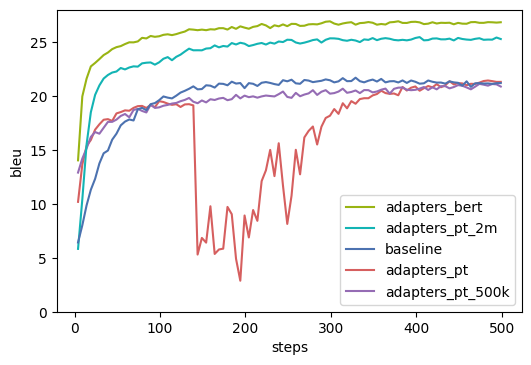

In [41]:
adapters_pt_df = adapters_pt_df[adapters_pt_df["steps"] < 500]
adapters_pt_500k_df = adapters_pt_500k_df[adapters_pt_500k_df["steps"] < 500]
# best_adapters_pt_2m_df = best_adapters_pt_2m_df[best_adapters_pt_2m_df["steps"] < 500]
best_adapters_pt_2m_df = adapters_pt_2m_df[adapters_pt_2m_df["steps"] < 500]
adapters_bert_df = adapters_bert_df[adapters_bert_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([adapters_pt_df, adapters_pt_500k_df, best_adapters_pt_2m_df, adapters_bert_df, baseline_df], ignore_index=True)
# comb_df["name"].unique(), len(comb_df)
plt.figure(figsize=(6, 4), dpi = 100) 
# color = ["#EE854A", "#6ACC64", "#D65F5F", "#956CB4", "#4C72B0"]
color = {
    "baseline": "#4C72B0",
    "adapters_bert": "#99b413",
    "adapters_pt_2m": "#13b4b4",
    "adapters_pt": "#D65F5F", 
    "adapters_pt_500k": "#956CB4"
}
# markers = {
#     "baseline": ".",
#     "adapters_bert": ",",
#     "adapters_pt_2m": "o",
#     "adapters_pt": "v", 
#     "adapters_pt_500k": "^"
# }
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name", palette=color, dashes=False)
ax.set_ylim([0, 28])
# ax.legend(["adapters_bert", "adapters_pt_2m", "adapters_pt_500k", "adapters_pt"])
handles, labels = ax.get_legend_handles_labels()
print(labels)
order = [3, 2, 4, 0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

['adapters_random', 'adapters_shuffled', 'adapters_shuffled_both', 'baseline']


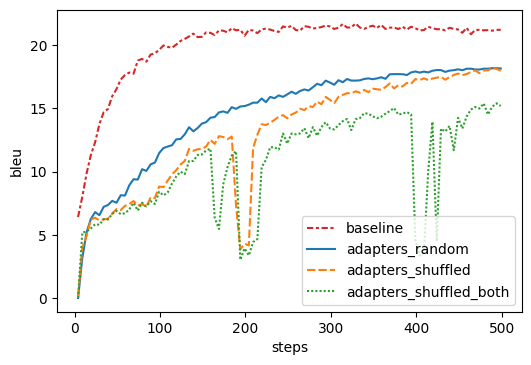

In [9]:
adapters_random_df = adapters_random_df[adapters_random_df["steps"] < 500]
adapters_shuffled_df = adapters_shuffled_df[adapters_shuffled_df["steps"] < 500]
adapters_shuffled_both_df = adapters_shuffled_both_df[adapters_shuffled_both_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([adapters_random_df, adapters_shuffled_df, adapters_shuffled_both_df, baseline_df], ignore_index=True)

plt.figure(figsize=(6, 4), dpi = 100) 
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")

handles, labels = ax.get_legend_handles_labels()
print(labels)
order = [3, 0, 1, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

['baseline_2m', 'adapters_random', 'baseline']


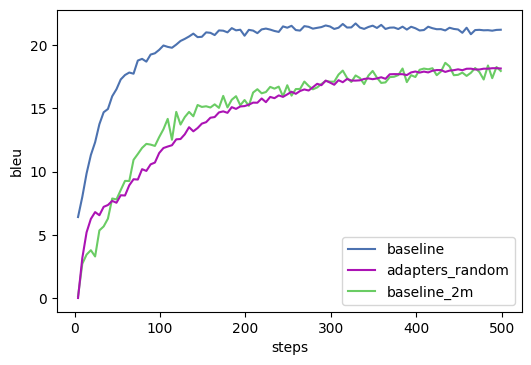

In [37]:
adapters_random_df = adapters_random_df[adapters_random_df["steps"] < 500]
# best_adapters_pt_2m_df = adapters_pt_2m_df[adapters_pt_2m_df["steps"] < 500]
# adapters_bert_df = adapters_bert_df[adapters_bert_df["steps"] < 500]
baseline_2m_df = baseline_2m_df[baseline_2m_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([baseline_2m_df, adapters_random_df, baseline_df], ignore_index=True)

plt.figure(figsize=(6, 4), dpi = 100) 
color = {
    "baseline": "#4C72B0",
    "baseline_2m": "#6ACC64",
    "adapters_random": "#ab13b4"
}
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name", dashes=False, palette=color)

handles, labels = ax.get_legend_handles_labels()
print(labels)
order = [2, 1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

<AxesSubplot:xlabel='steps', ylabel='bleu'>

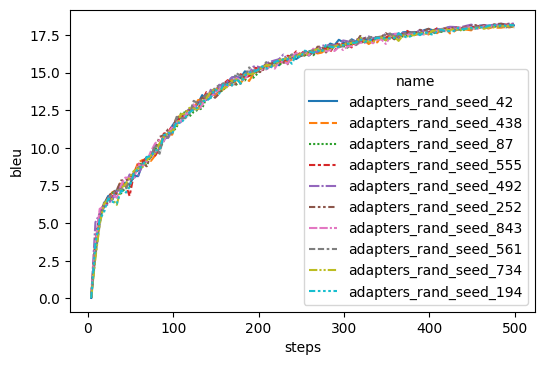

In [11]:
adapters_rand_multiseed_df = adapters_rand_multiseed_df[adapters_rand_multiseed_df["steps"] < 500]
# best_adapters_pt_2m_df = adapters_pt_2m_df[adapters_pt_2m_df["steps"] < 500]
# adapters_bert_df = adapters_bert_df[adapters_bert_df["steps"] < 500]
# baseline_2m_df = baseline_2m_df[baseline_2m_df["steps"] < 500]
# baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([adapters_rand_multiseed_df], ignore_index=True)

plt.figure(figsize=(6, 4), dpi = 100) 
sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")

In [12]:
def parse_output(file):
    baseline_out = []
    with open(file, "r") as f:
        d = {}
        for line in f.readlines():
            if "input:" in line:
                d["input"] = line[6:].strip()
            elif "prediction:" in line:
                d["prediction"] = line[11:].strip()
            else:
                baseline_out.append(d)
                d = {}

    return sorted(baseline_out, key=lambda x: x["input"])

files = [
    "../outputs/predictions_baseline_normal.txt",
    "../outputs/predictions_adapters_2m.txt",
    "../outputs/predictions_adapters_bert.txt"
]
for _f in files:
    with open(_f + ".upd", "w") as f:
        for val in parse_output(_f):
            print(f"input: {val['input']}", file=f)
            print(f"prediction: {val['prediction']}\n", file=f)